# Классификация SVM

**Dataset Description:**

- age : возраст (разница в 5 лет) 
- height(cm) : рост (см)
- weight(kg) : вес (кг)
- waist(cm) : длина окружности талии (см)
- eyesight(left) : зрение (слева)
- eyesight(right) : зрение (справа)
- hearing(left) : слух (слева)
- hearing(right) : слух (справа)
- systolic : давление в артериях при сокращении сердца
- relaxation : давление в артериях при расслаблении
- fasting blood sugar : уровень сахара в крови натощак
- Cholesterol : общий уровень холестерина
- triglyceride : это тип жира, называемого липидами, который циркулирует в крови
- HDL : холестерин ЛПВП (липопротеины высокой плотности), иногда называемый «хорошим» холестерином, поглощает холестерин в крови и переносит его обратно в печень
- LDL : холестерин ЛПНП (липопротеины низкой плотности), иногда называемый «плохим» холестерином, составляет большую часть холестерина в вашем организме. Высокий уровень холестерина ЛПНП повышает риск сердечных заболеваний и инсульта
- hemoglobin : гемоглобин, белок, содержащийся в эритроцитах, который отвечает за доставку кислорода к тканям
- Urine protein : анализ на белок в моче измеряет белок в моче (моче), и большое его количество указывает на проблемы с почками.
- serum creatinine : продукт жизнедеятельности, вырабатываемый мышцами и отфильтровываемый почками. Большое его количество указывает на проблемы с почками
- AST : тип глутаминово-щавелево-уксусной трансаминазы. Слишком большое количество указывает на повреждение печени
- ALT : тип глутаминово-щавелево-уксусной трансаминазы. повышенный уровень АЛТ часто является признаком заболевания печени.
- Gtp : γ-GTP. Гамма-глютамилтранспептидаза – фермент (белок) печени и поджелудочной железы, активность которого в крови повышается при заболеваниях печени и злоупотреблении алкоголем.
- dental caries : кариес 
- smoking : целевая переменная - курение

## Импортируем данные

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, \
                            confusion_matrix, precision_score, recall_score, \
                            roc_curve, f1_score, auc
from sklearn.preprocessing import StandardScaler, PowerTransformer
import optuna
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('train_dataset.csv')
data.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,35,170,85,97.0,0.9,0.9,1,1,118,78,97,239,153,70,142,19.8,1,1.0,61,115,125,1,1
1,20,175,110,110.0,0.7,0.9,1,1,119,79,88,211,128,71,114,15.9,1,1.1,19,25,30,1,0
2,45,155,65,86.0,0.9,0.9,1,1,110,80,80,193,120,57,112,13.7,3,0.6,1090,1400,276,0,0
3,45,165,80,94.0,0.8,0.7,1,1,158,88,249,210,366,46,91,16.9,1,0.9,32,36,36,0,0
4,20,165,60,81.0,1.5,0.1,1,1,109,64,100,179,200,47,92,14.9,1,1.2,26,28,15,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38984 entries, 0 to 38983
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  38984 non-null  int64  
 1   height(cm)           38984 non-null  int64  
 2   weight(kg)           38984 non-null  int64  
 3   waist(cm)            38984 non-null  float64
 4   eyesight(left)       38984 non-null  float64
 5   eyesight(right)      38984 non-null  float64
 6   hearing(left)        38984 non-null  int64  
 7   hearing(right)       38984 non-null  int64  
 8   systolic             38984 non-null  int64  
 9   relaxation           38984 non-null  int64  
 10  fasting blood sugar  38984 non-null  int64  
 11  Cholesterol          38984 non-null  int64  
 12  triglyceride         38984 non-null  int64  
 13  HDL                  38984 non-null  int64  
 14  LDL                  38984 non-null  int64  
 15  hemoglobin           38984 non-null 

## Проведем EDA (Exploratory Data Analysis) - первичный анализ данных

Все данные в нашем датасете имеют числовое значение.

In [4]:
def eda_info(df):
    x = pd.DataFrame(
        {
            "Доля пропусков": df.isnull().mean(),
            "Минимальное значение": df.min(),
            "Максимальное значение": df.max(),
            "Среднее значение": df.mean(),
            "Медиана": df.median(),
            "Дисперсия": df.var(),
            "Квантиль 0.1": df.quantile(0.1),
            "Квантиль 0.9": df.quantile(0.9),
            "Квартиль 1": df.quantile(0.25),
            "Квартиль 3": df.quantile(0.75)
        }
    )
    
    return x

In [5]:
col_num = data.select_dtypes(include=["number"]).columns
eda_info(data[col_num])

,Доля пропусков,Минимальное значение,Максимальное значение,Среднее значение,Медиана,Дисперсия,Квантиль 0.1,Квантиль 0.9,Квартиль 1,Квартиль 3
age,0.0,20.0,85.0,44.127591,40.0,145.529573,30.0,60.0,40.0,55.0
height(cm),0.0,130.0,190.0,164.689488,165.0,84.410288,150.0,175.0,160.0,170.0
weight(kg),0.0,30.0,135.0,65.938718,65.0,166.321797,50.0,85.0,55.0,75.0
waist(cm),0.0,51.0,129.0,82.062115,82.0,86.989160,70.0,94.0,76.0,88.0
eyesight(left),0.0,0.1,9.9,1.014955,1.0,0.248529,0.6,1.5,0.8,1.2
eyesight(right),0.0,0.1,9.9,1.008768,1.0,0.243851,0.6,1.5,0.8,1.2
hearing(left),0.0,1.0,2.0,1.025369,1.0,0.024726,1.0,1.0,1.0,1.0
hearing(right),0.0,1.0,2.0,1.026190,1.0,0.025505,1.0,1.0,1.0,1.0
systolic,0.0,71.0,233.0,121.475631,120.0,186.145675,104.0,138.0,112.0,130.0
relaxation,0.0,40.0,146.0,75.994408,76.0,93.291147,64.0,88.0,70.0,82.0


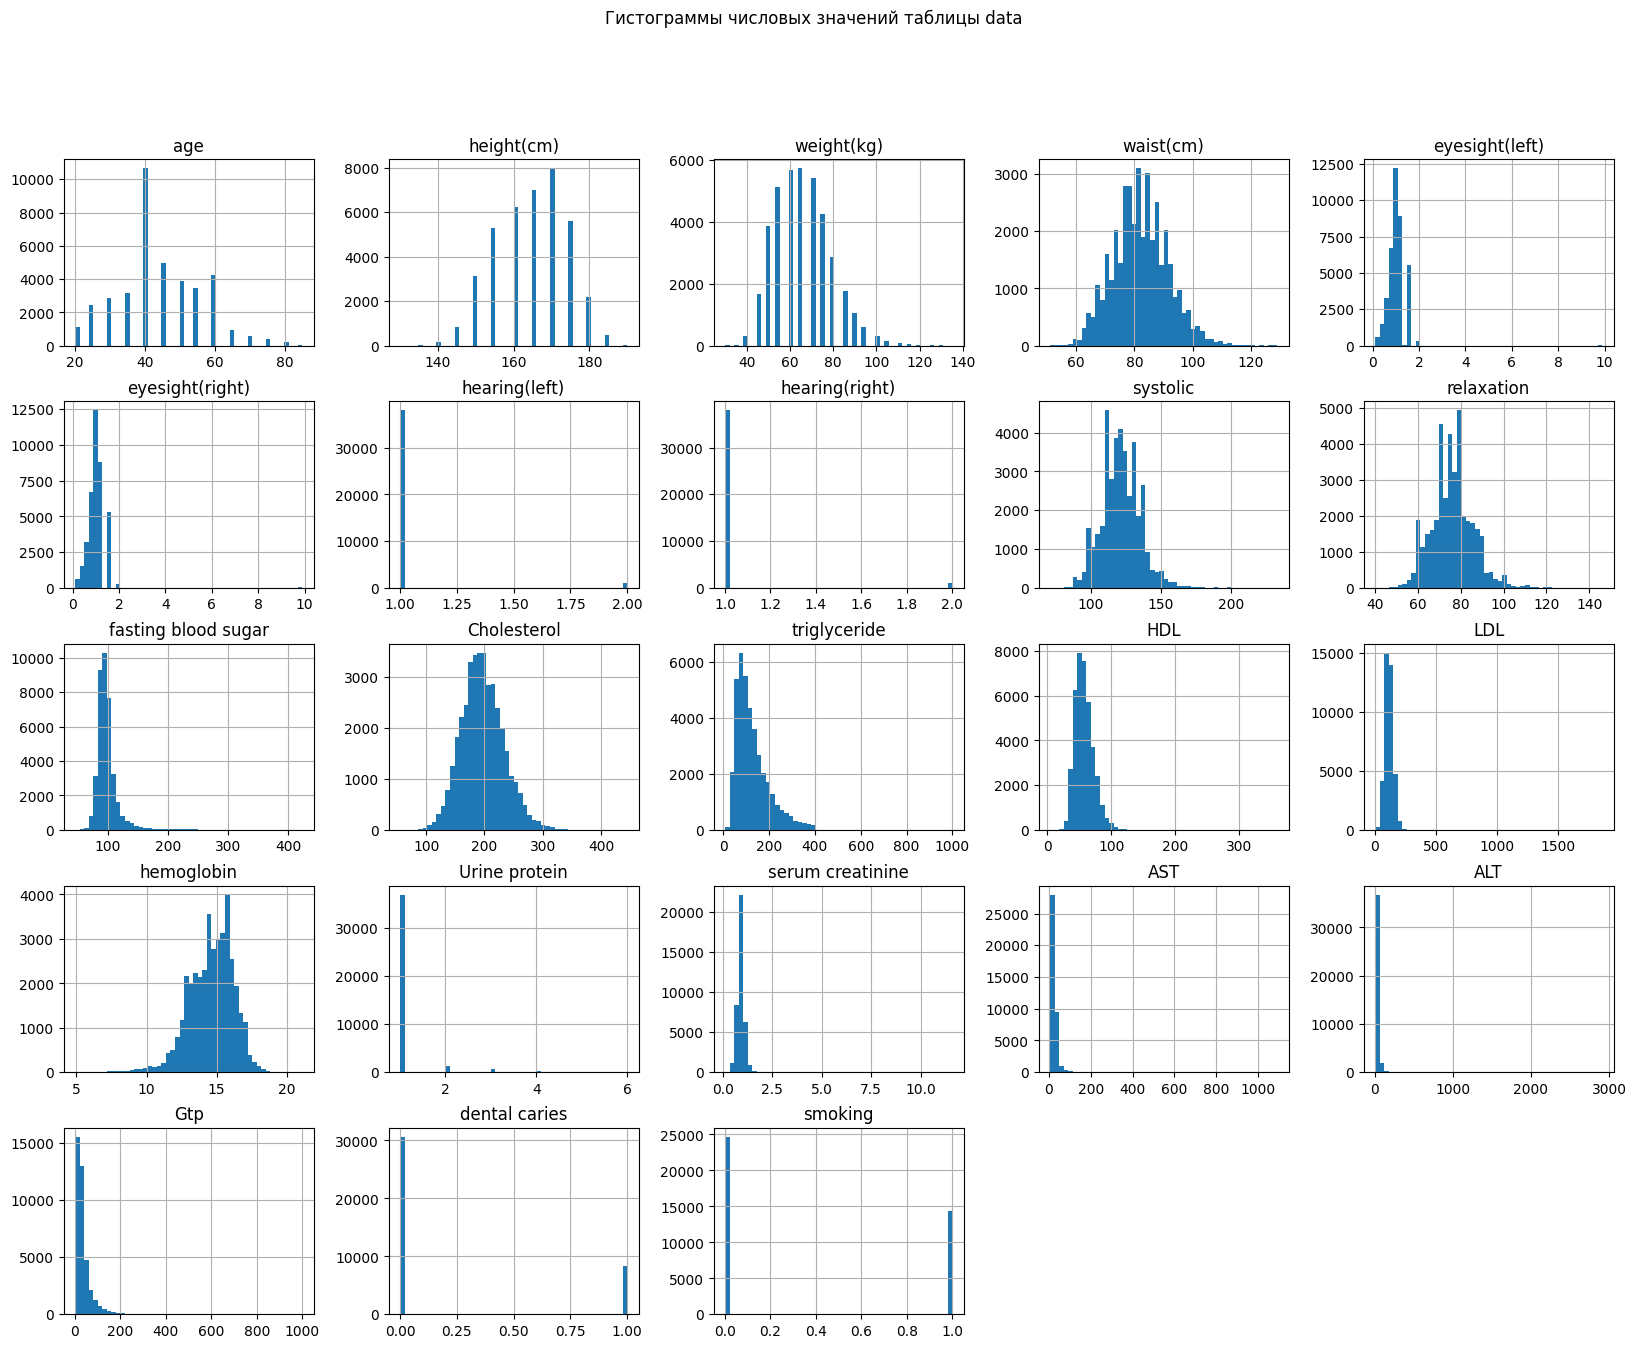

In [6]:
data.hist(bins=50, figsize=(20, 15))
plt.suptitle("Гистограммы числовых значений таблицы data")
plt.show()

## Рассмотрим целевой признак `smoking`

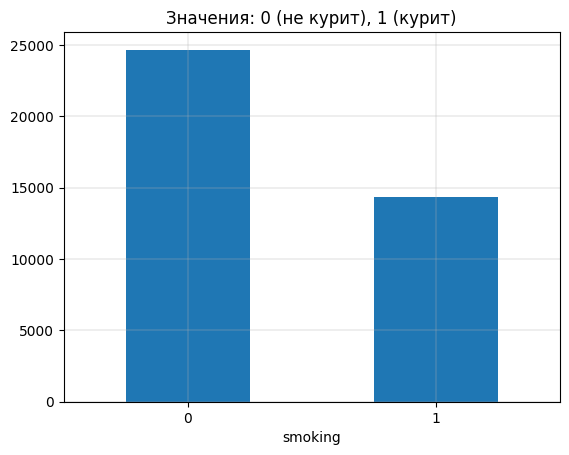

In [7]:
data['smoking'].value_counts().sort_index().plot(kind='bar')
plt.xticks(rotation=0)
plt.grid(linewidth=0.3)
plt.title('Значения: 0 (не курит), 1 (курит)')
plt.show()

In [8]:
smoking_ratio = data['smoking'].mean()
print(f"Доля курящих (smoking = 1): {smoking_ratio:.2f}")

Доля курящих (smoking = 1): 0.37


Есть небольшой дисбаланс данных, учтем его в будущем при построении модели.

## Анализ данных

### Проверка на выбросы в данных

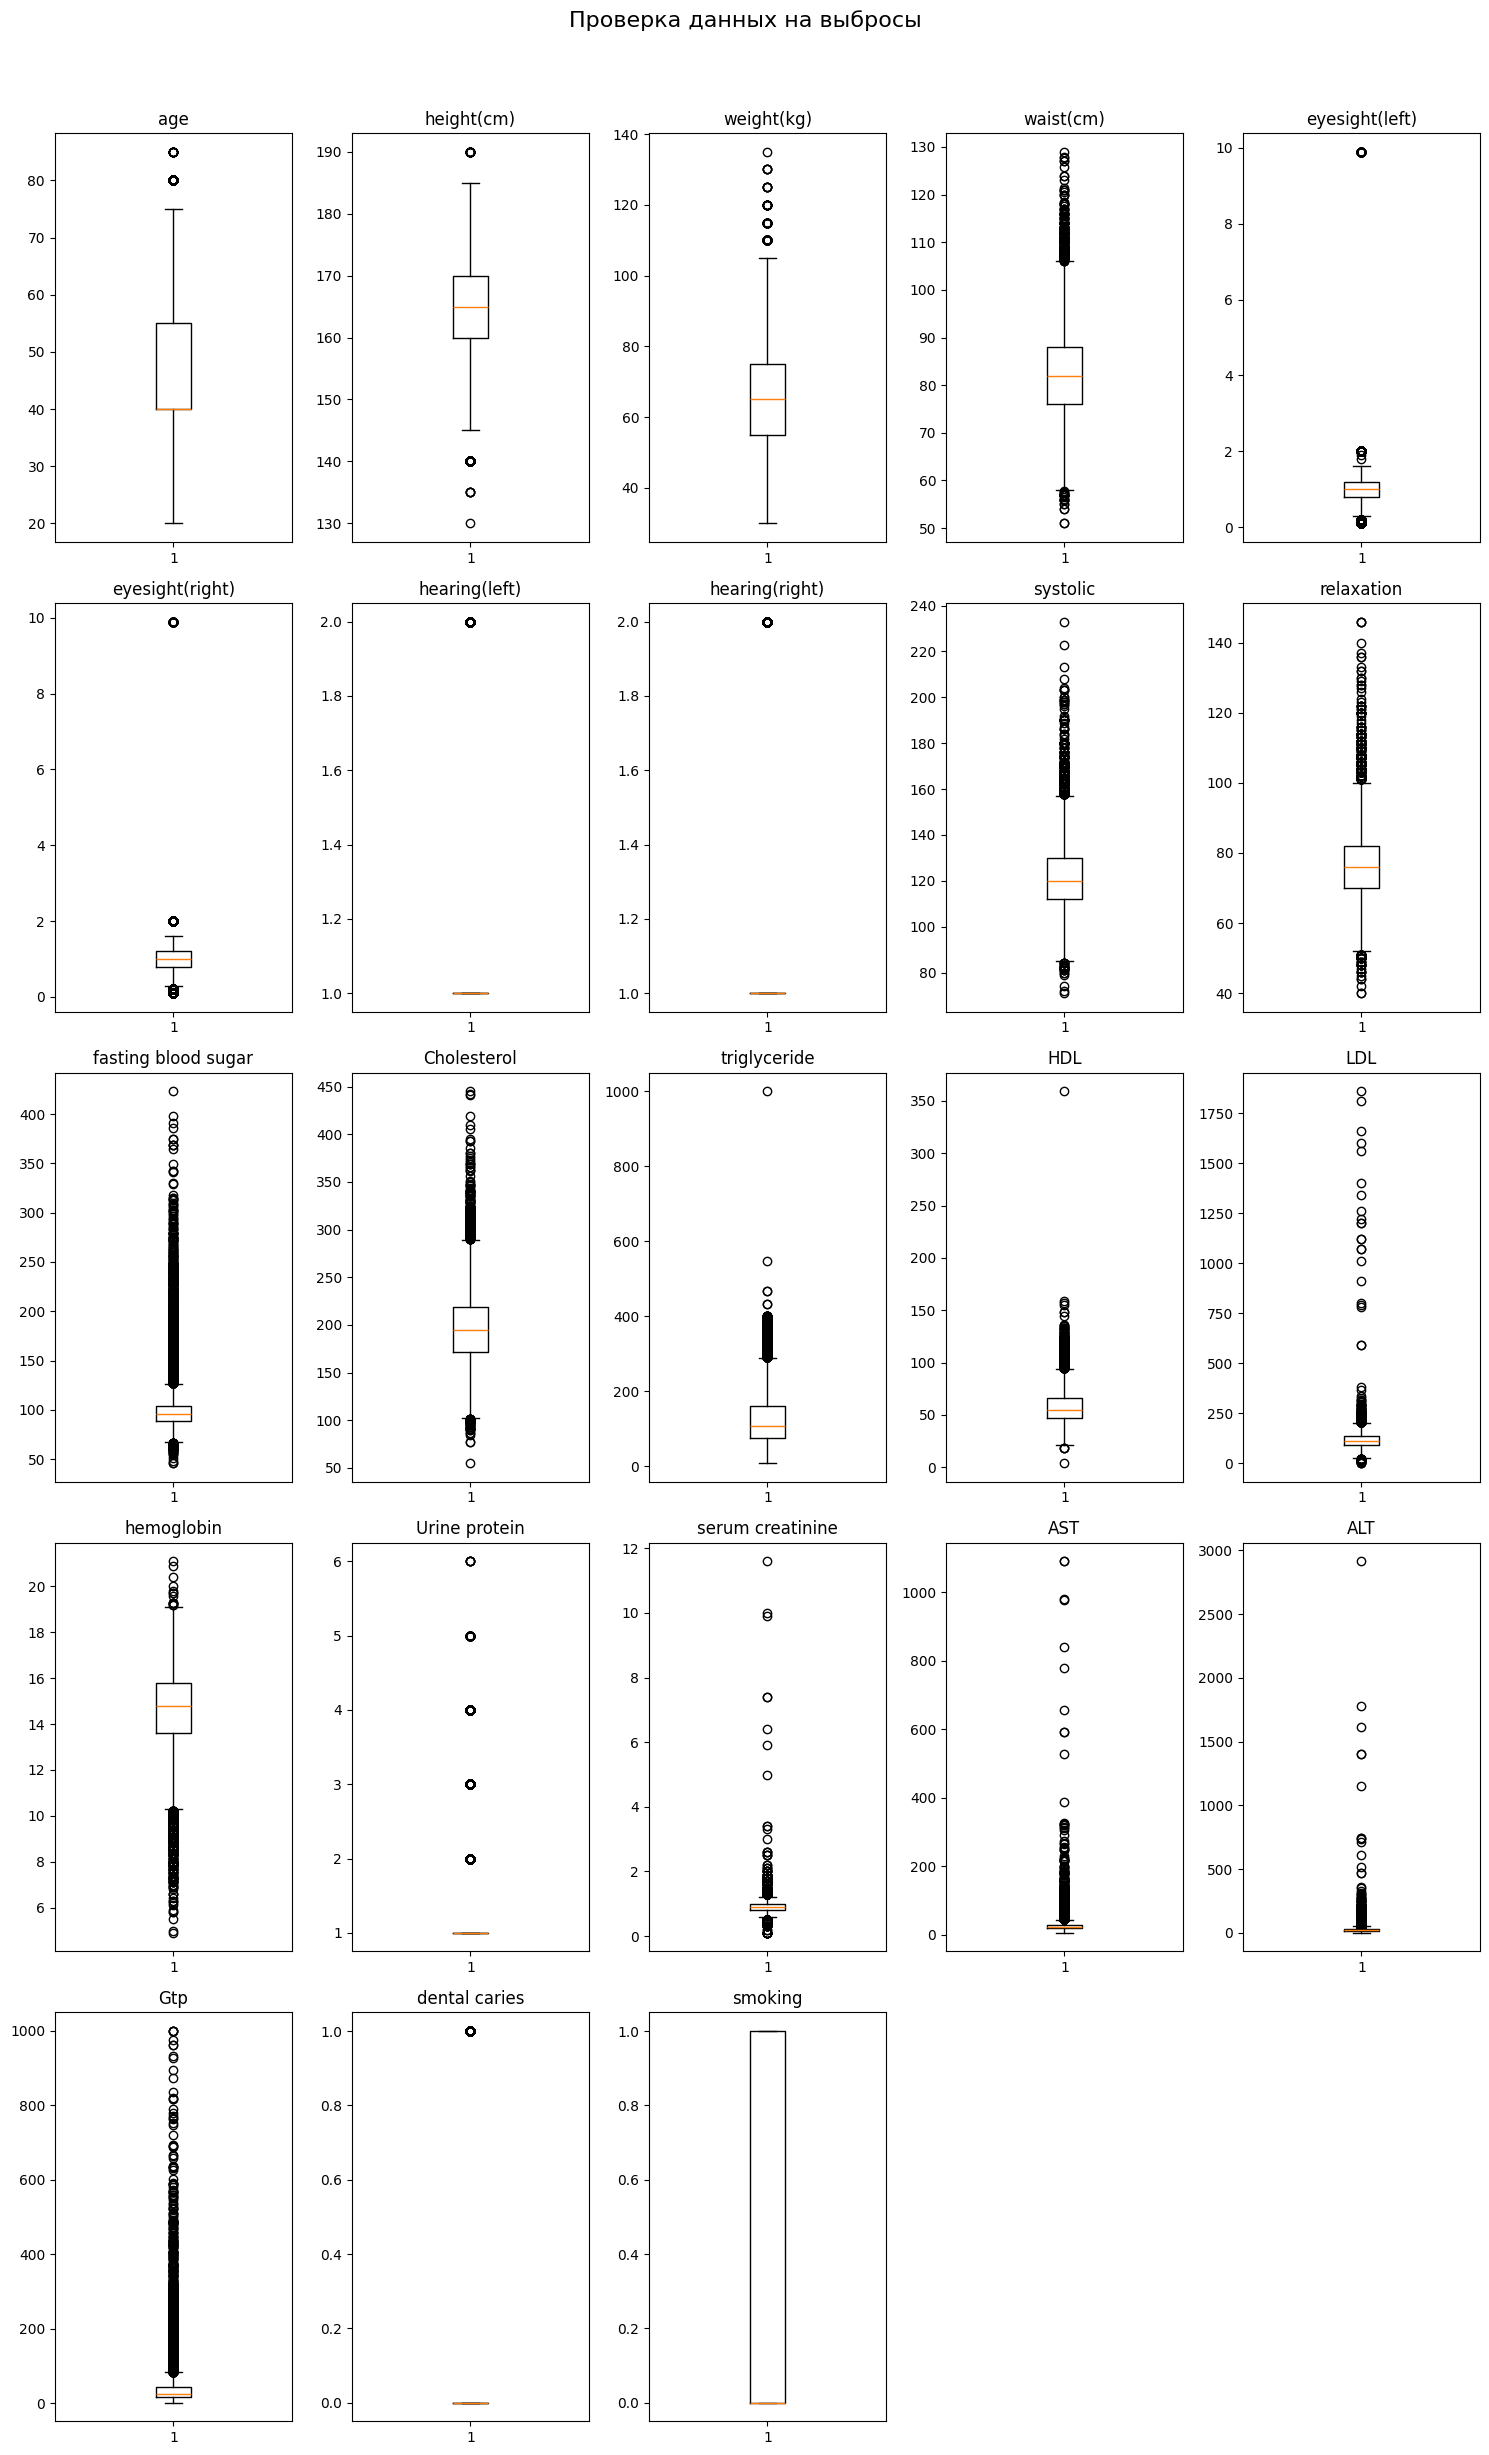

In [9]:
n = len(col_num)
ncols = 5  # Количество столбцов в сетке
nrows = (n + ncols - 1) // ncols  # Количество строк

# Создание фигуры и подграфиков
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
axes = axes.flatten()  # Преобразование в одномерный массив для удобства

# Создание boxplot для каждого числового столбца
for i, column in enumerate(col_num):
    axes[i].boxplot(data[column])
    axes[i].set_title(column)  # Заголовок для каждого графика

# Удаление пустых подграфиков, если они есть
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
    
fig.suptitle("Проверка данных на выбросы", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Автоматическая настройка отступов
plt.show()  # Отображение графиков

### Признаки относительно целевого признака

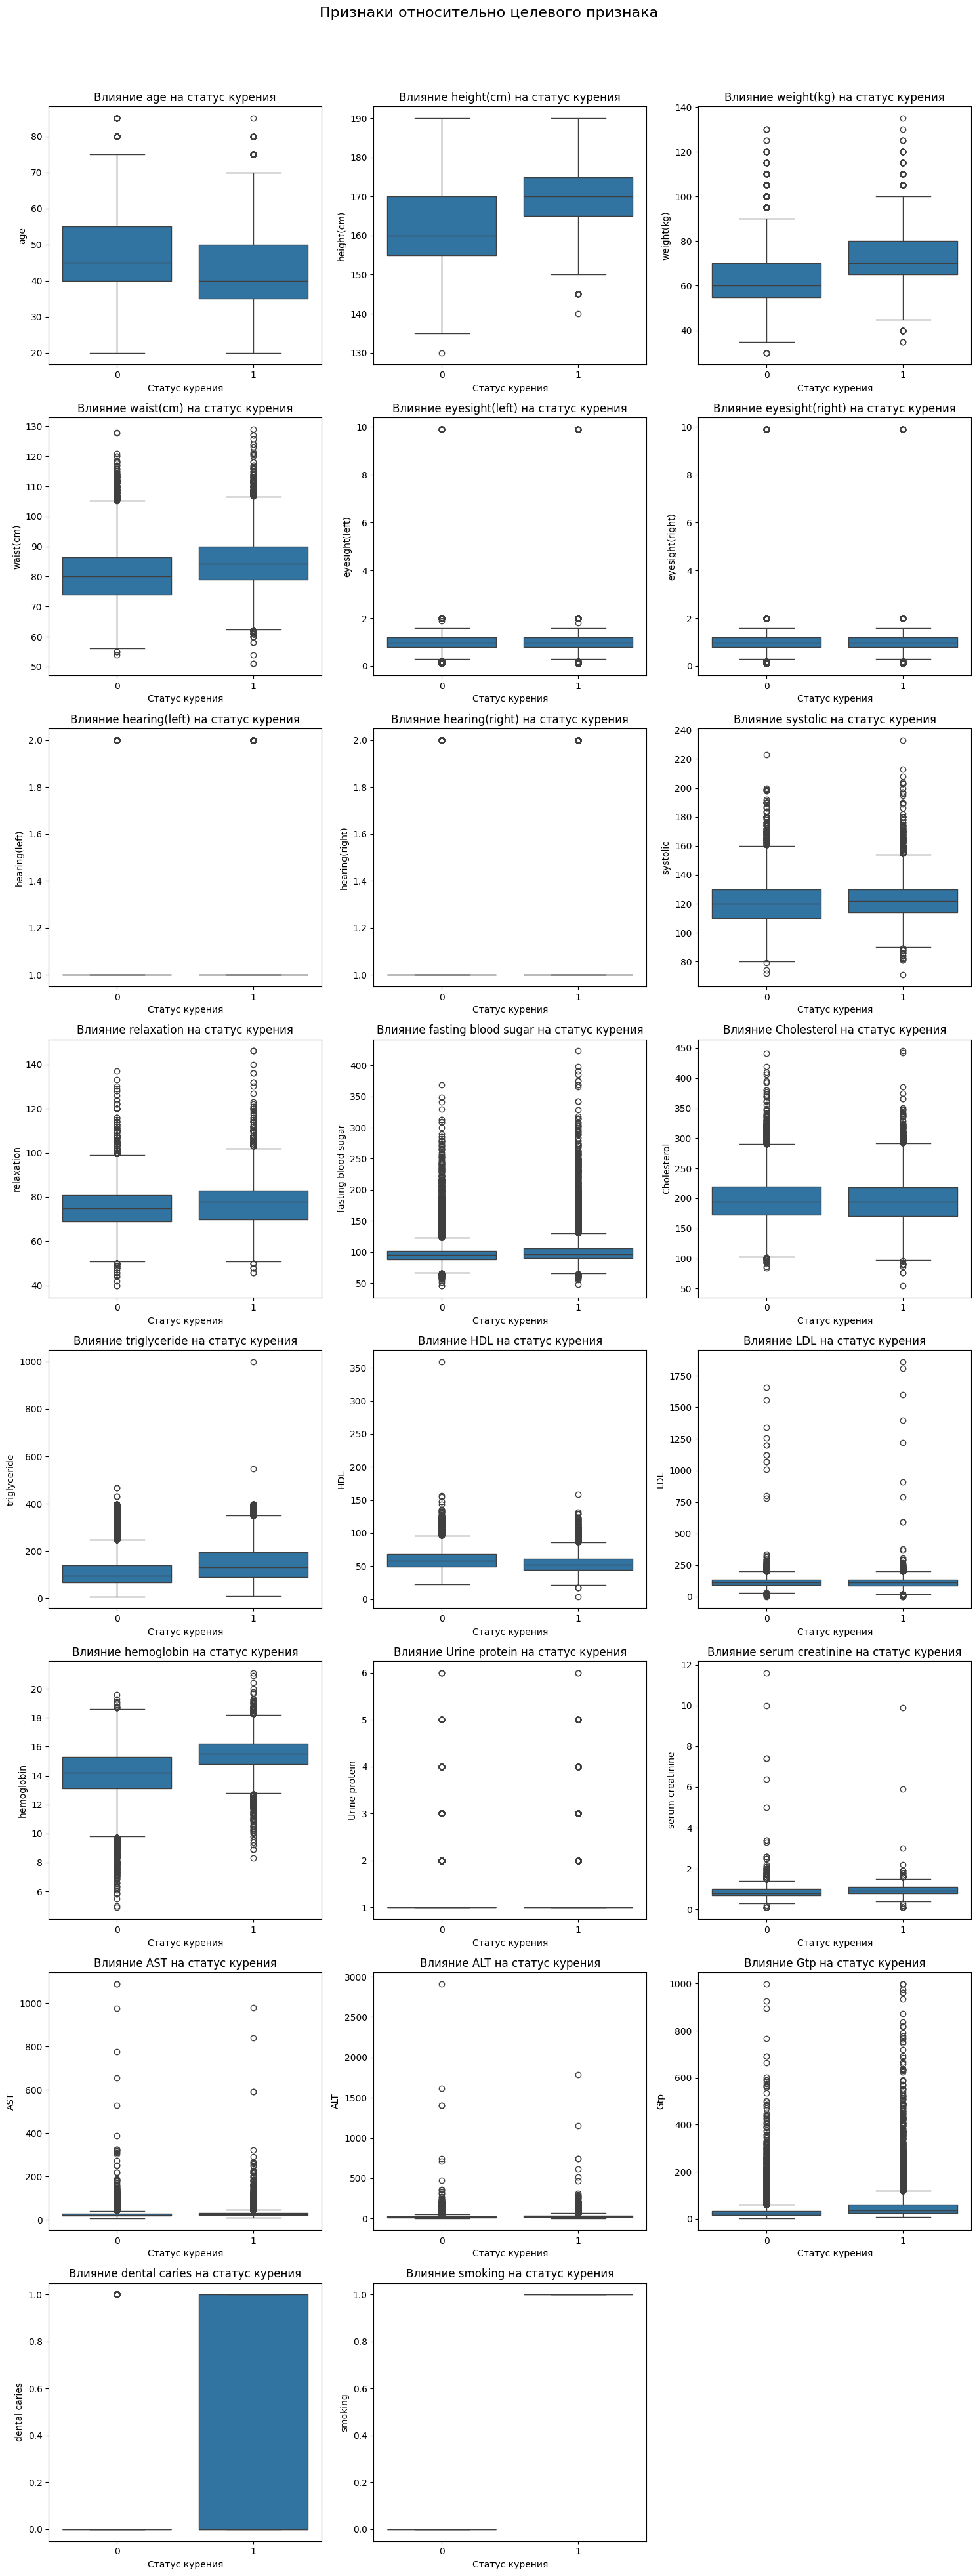

In [10]:
n = len(col_num)
ncols = 3  # Количество столбцов в сетке
nrows = (n + ncols - 1) // ncols  # Количество строк

# Создание фигуры и подграфиков
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
axes = axes.flatten()  # Преобразование в одномерный массив для удобства

for i, feature in enumerate(col_num):
    sns.boxplot(x='smoking', y=feature, data=data, ax=axes[i])  # Указываем ось для каждого графика
    axes[i].set_title(f'Влияние {feature} на статус курения')
    axes[i].set_xlabel('Статус курения')
    axes[i].set_ylabel(feature)

# Убираем пустые подграфики, если они есть
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Признаки относительно целевого признака", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Видим, что в некоторых данных имеются выбросы. Пока их трогать не будем, посмотрим как с ними поведет себя модель.

### Построим матрицу корреляции

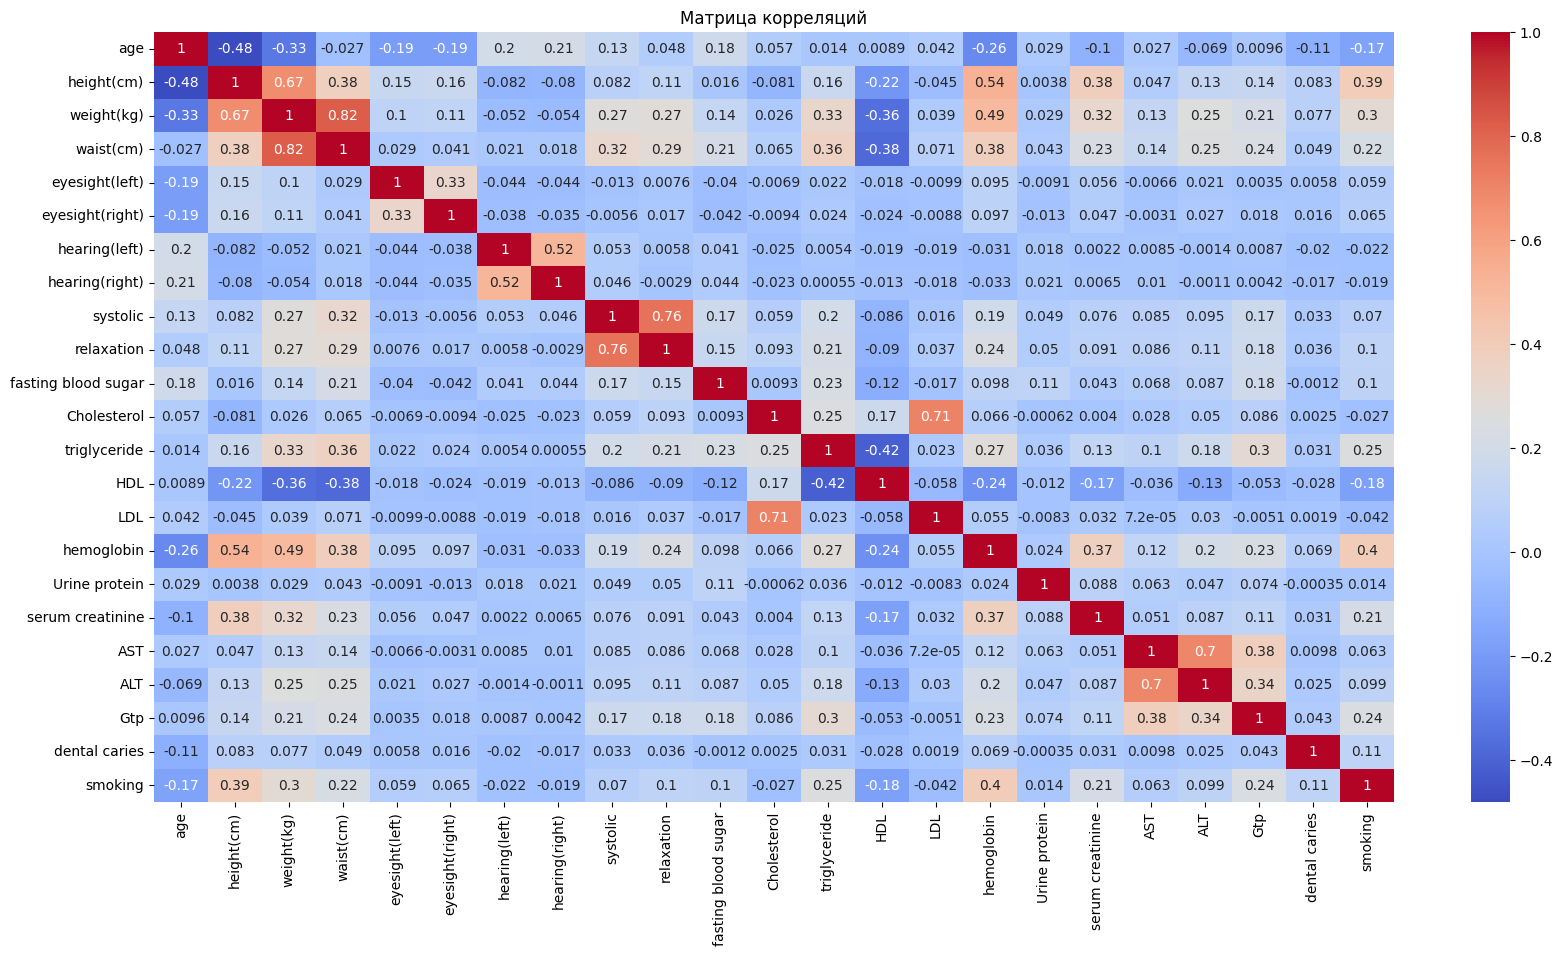

In [11]:
corr = data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Матрица корреляций")
plt.show()

Видим хорошую корреляцию между Cholesterol и LDL, relaxation и systolic, waist(cm) и weight(kg), AST и ALT. 

## Построим модель SVM

### Поделим нашу таблицу на тренировочную и тестовую в соотношении 80/20

In [12]:
X = data.drop('smoking', axis=1)
y = data['smoking']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Размер тренировочной выборки (признаки):', X_train.shape)
print('Размер тестовой выборки (признаки):', X_test.shape)
print('Размер тренировочной выборки (целевой признак):', y_train.shape)
print('Размер тестовой выборки (целевой признак):', y_test.shape)

Размер тренировочной выборки (признаки): (31187, 22)
Размер тестовой выборки (признаки): (7797, 22)
Размер тренировочной выборки (целевой признак): (31187,)
Размер тестовой выборки (целевой признак): (7797,)


### Отшкалируем данные

In [13]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

scaler = PowerTransformer()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,0.124177,-1.050192,0.407152,0.863325,-0.186864,-0.471384,-1.040834e-17,-2.081668e-17,-0.133824,0.456416,-0.294871,0.904132,0.783822,0.322225,0.639587,-0.172924,-0.240102,-0.370518,-1.099606,-1.028968,-0.739722,-0.521839
1,-0.291960,-1.050192,-1.879372,-2.091587,0.096261,-0.169123,-1.040834e-17,-2.081668e-17,-1.343918,-0.937104,0.026590,-1.179927,-2.099422,0.992533,-1.092464,-2.347810,-0.240102,-0.370518,-0.474551,-1.653549,-2.084167,-0.521839
2,1.276529,0.564004,-0.837479,-1.581195,-0.186864,-0.169123,-1.040834e-17,-2.081668e-17,-0.058780,0.456416,0.100977,0.228634,-1.217792,0.702995,0.411896,-0.673350,-0.240102,0.156675,0.373507,-0.219205,-0.536260,-0.521839
3,-0.291960,1.135666,1.402518,1.061003,0.608765,0.624408,-1.040834e-17,-2.081668e-17,0.449285,0.049932,-0.659770,-0.243302,-0.440934,-1.772398,0.589959,1.131120,-0.240102,1.090233,2.301872,2.324640,0.809951,-0.521839
4,-0.728654,1.724143,0.025619,-0.302141,0.608765,-2.406401,-1.040834e-17,-2.081668e-17,-0.058780,0.940445,-0.564054,-0.743474,-0.376756,0.762775,-0.806881,0.095139,-0.240102,0.156675,-0.302556,-1.028968,-1.117008,-0.521839


### Подберем гиперпараметры для модели

In [26]:
def calculate_metrics_and_plot_roc(model, X_train, y_train, X_test, y_test):
    # Обучение модели
    model.fit(X_train, y_train)

    # Предсказание вероятностей на обучающей и тестовой выборке
    y_train_proba = model.predict_proba(X_train)[:, 1]
    y_test_proba = model.predict_proba(X_test)[:, 1]

    # Расчет AUC-ROC
    roc_auc_train = roc_auc_score(y_train, y_train_proba)
    roc_auc_test = roc_auc_score(y_test, y_test_proba)
    print(f"ROC-AUC Train: {roc_auc_train:.2f}")
    print(f"ROC-AUC Test: {roc_auc_test:.2f}")

    # Построение ROC-кривой
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
    plt.figure()
    plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='ROC Curve Train')
    plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC Curve Test')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve ({type(model).__name__})')
    plt.legend()
    plt.show()

    # Поиск порога, максимизирующего F1-score
    thresholds = np.arange(0.0, 1.0, 0.01)
    f1_scores = [f1_score(y_test, y_test_proba >= t) for t in thresholds]
    optimal_threshold = thresholds[np.argmax(f1_scores)]
    print(f"Optimal Threshold: {optimal_threshold:.2f}")

    # Пересчет метрик с учетом оптимального порога
    y_train_pred_optimal = (y_train_proba >= optimal_threshold).astype(int)
    y_test_pred_optimal = (y_test_proba >= optimal_threshold).astype(int)

    train_precision = precision_score(y_train, y_train_pred_optimal)
    train_recall = recall_score(y_train, y_train_pred_optimal)
    test_precision = precision_score(y_test, y_test_pred_optimal)
    test_recall = recall_score(y_test, y_test_pred_optimal)

    print(f"Optimal Training Precision: {train_precision:.2f}")
    print(f"Optimal Training Recall: {train_recall:.2f}")
    print(f"Optimal Test Precision: {test_precision:.2f}")
    print(f"Optimal Test Recall: {test_recall:.2f}")

    metrics = {
        'params': [
            'Training_Precision', 'Test_Precision',
            'Training_Recall', 'Test_Recall',
            'ROC_AUC_Train', 'ROC_AUC_Test'
        ],
        'values': [
            train_precision, test_precision,
            train_recall, test_recall,
            roc_auc_train, roc_auc_test
        ]
    }

    return metrics

In [ ]:
# Определяем сетку параметров для C, которые мы хотим проверить для линейного ядра
param_grid = {'C': [0.01, 0.1, 1, 10, 100],
              }

# Создаем модель логистической регрессии
svm_model_lin = SVC(kernel='linear')

# Создаем объект RandomizedSearchCV с моделью логистической регрессии и сеткой параметров
random_search = RandomizedSearchCV(svm_model_lin, param_grid, n_iter=20, cv=5)  # cv указывает количество блоков для кросс-валидации

# Обучаем модель на данных с использованием кросс-валидации
random_search.fit(X_train, y_train)

# Получаем лучшее значение параметра C, найденное в процессе кросс-валидации
# best_params = random_search.best_params_[param_grid]
print('Лучшее значение параметра:', random_search.best_params_)


# Создаем модель логистической регрессии с лучшим значением C
best_svm_model_lin = SVC(kernel='linear', probability=True, **random_search.best_params_)

ROC-AUC Train: 0.82
ROC-AUC Test: 0.82


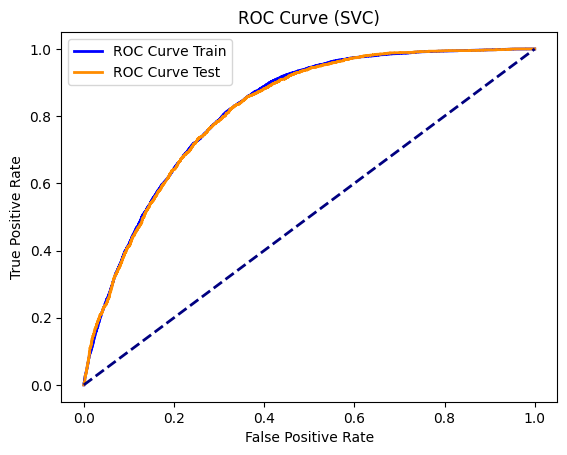

Optimal Threshold: 0.30
Optimal Training Precision: 0.58
Optimal Training Recall: 0.85
Optimal Test Precision: 0.57
Optimal Test Recall: 0.86


In [ ]:
metrics_svm_linear  = calculate_metrics_and_plot_roc(best_svm_model_lin, X_train, y_train, X_test, y_test)

In [ ]:
# Определяем сетку параметров для C, которые мы хотим проверить для разных ядер
param_grid = {'C': [0.01, 0.1, 1, 10],
              'kernel':['linear', 'poly', 'rbf', 'sigmoid',]
              }

svm_model = SVC()

# Создаем объект RandomizedSearchCV с моделью логистической регрессии и сеткой параметров
random_search = RandomizedSearchCV(svm_model, param_grid, cv=5, n_iter=20)  # cv указывает количество блоков для кросс-валидации

# Обучаем модель на данных с использованием кросс-валидации
random_search.fit(X_train, y_train)

# Получаем лучшее значение параметра C, найденное в процессе кросс-валидации
# best_params = random_search.best_params_[param_grid]
print('Лучшее значение параметра:', random_search.best_params_)


# Создаем модель с лучшим значением C
best_svm_model = SVC(**random_search.best_params_, probability=True)

Лучшее значение параметра: {'kernel': 'rbf', 'C': 1}


ROC-AUC Train: 0.87
ROC-AUC Test: 0.83


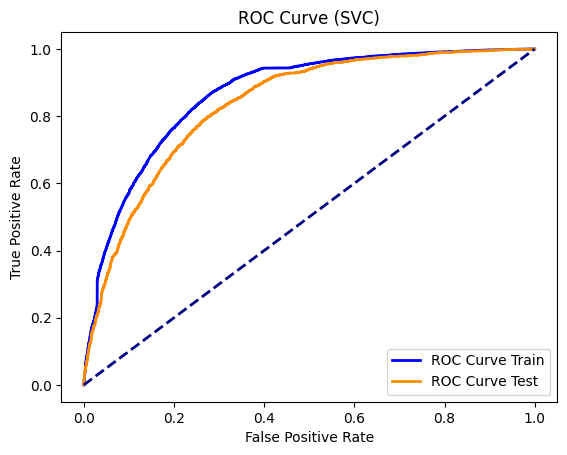

Optimal Threshold: 0.31
Optimal Training Precision: 0.65
Optimal Training Recall: 0.85
Optimal Test Precision: 0.61
Optimal Test Recall: 0.82


In [ ]:
metrics_svm_not_linear  = calculate_metrics_and_plot_roc(best_svm_model, X_train, y_train, X_test, y_test)

**Соберем все результаты в одну таблицу, чтобы было проще сравнивать алгоритмы**

In [ ]:
metrics_svm_not_linear['metrics'] = ['metrics_svm_not_linear' for i in range(6)]

metrics_svm_linear['metrics'] = ['metrics_svm_linear' for i in range(6)]

In [ ]:
df_stat = pd.concat([pd.DataFrame(metrics_svm_not_linear),
                    pd.DataFrame(metrics_svm_linear)])

In [ ]:
df_stat = df_stat.pivot_table(columns = 'params',
                            index='metrics',
                            values='values').reset_index()[['metrics','Test_Precision',	'Training_Precision',
                                                            'Test_Recall',	'Training_Recall', 'ROC_AUC_Train', 'ROC_AUC_Test']]
df_stat['dif_Precision'] = round((df_stat['Test_Precision'] - df_stat['Training_Precision'])/df_stat['Training_Precision'],2)

df_stat['dif_Recall'] = round((df_stat['Test_Recall'] - df_stat['Training_Recall'])/df_stat['Training_Recall'],2)
df_stat

params,metrics,Test_Precision,Training_Precision,Test_Recall,Training_Recall,ROC_AUC_Train,ROC_AUC_Test,dif_Precision,dif_Recall
0,metrics_svm_linear,0.573159,0.58208,0.855067,0.851601,0.819636,0.818034,-0.02,0.00
1,metrics_svm_not_linear,0.609153,0.65289,0.820695,0.845077,0.865862,0.834051,-0.07,-0.03


In [ ]:
df_stat['abs_dif_precision'] = abs(df_stat['dif_Precision'])

In [ ]:
df_stat.sort_values('abs_dif_precision', ascending=True).T

,0,1
params,,
metrics,metrics_svm_linear,metrics_svm_not_linear
Test_Precision,0.573159,0.609153
Training_Precision,0.58208,0.65289
Test_Recall,0.855067,0.820695
Training_Recall,0.851601,0.845077
ROC_AUC_Train,0.819636,0.865862
ROC_AUC_Test,0.818034,0.834051
dif_Precision,-0.02,-0.07
dif_Recall,0.0,-0.03


**Видим, что лучшие значения метрик мы получили при параметрах `{'kernel': 'rbf', 'C': 1}`.**

### Подберем гиперпараметры для модели с помощью Optuna

In [20]:
def objective(trial):
    C = trial.suggest_loguniform('C', 1e-3, 1e3)
    kernel = trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly', 'sigmoid'])
    model = SVC(C=C, kernel=kernel)
    score = cross_val_score(model, X_train, y_train, n_jobs=-1, cv=5)
    return score.mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)
best_params_optuna = study.best_params
print(f"Лучшие параметры (Optuna): {best_params_optuna}")

[I 2025-02-22 04:11:13,487] A new study created in memory with name: no-name-26f96726-9424-452d-8a0e-c4397809f267
[I 2025-02-22 04:11:46,975] Trial 0 finished with value: 0.7557311770200517 and parameters: {'C': 0.8586951080971694, 'kernel': 'rbf'}. Best is trial 0 with value: 0.7557311770200517.
[I 2025-02-22 04:12:09,368] Trial 1 finished with value: 0.7421358323356827 and parameters: {'C': 0.016824337656218227, 'kernel': 'linear'}. Best is trial 0 with value: 0.7557311770200517.
[I 2025-02-22 04:12:39,222] Trial 2 finished with value: 0.6379581192876053 and parameters: {'C': 0.001782244690211817, 'kernel': 'poly'}. Best is trial 0 with value: 0.7557311770200517.
[I 2025-02-22 04:13:10,935] Trial 3 finished with value: 0.7527489791783903 and parameters: {'C': 0.2756912440626674, 'kernel': 'rbf'}. Best is trial 0 with value: 0.7557311770200517.
[I 2025-02-22 04:13:39,850] Trial 4 finished with value: 0.6521308187654238 and parameters: {'C': 0.0038170551768222432, 'kernel': 'poly'}. Be

Лучшие параметры (Optuna): {'C': 0.8586951080971694, 'kernel': 'rbf'}


**Лучшие значения метрик при Optuna мы получили при параметрах `{'kernel': 'rbf', 'C': 0.8586951080971694}`, что практически равно гиперпараметрам, полученным с помощью RandomizedSearchCV**